In [3]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) # stands for 2 qubits and 2 classical bits

# currently : 0. 0
circuit.x(0)
# 1,0
circuit.cx(0,1) # cnot. controlled not. Flips 2nd qubit IF first qubit is 1
# 1,1
circuit.measure([0,1], [0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:
#circuit.draw(output="mpl")

In [8]:
from qiskit import IBMQ

IBMQ.save_account(open("/home/rajdeep/Quantum_Programming/Token.txt","r").read())

configrc.store_credentials:WARNING:2023-02-11 13:35:24,189: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} qued and {qubit_count } qubits")

ibmq_qasm_simulator has 2 qued and simulated qubits
ibmq_lima has 37 qued and 5 qubits
ibmq_belem has 32 qued and 5 qubits
ibmq_quito has 41 qued and 5 qubits
simulator_statevector has 2 qued and simulated qubits
simulator_mps has 2 qued and simulated qubits
simulator_extended_stabilizer has 2 qued and simulated qubits
simulator_stabilizer has 2 qued and simulated qubits
ibmq_manila has 51 qued and 5 qubits
ibm_nairobi has 532 qued and 7 qubits
ibm_oslo has 84 qued and 7 qubits


In [16]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_qasm_simulator")
job = q.execute(circuit, backend = backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


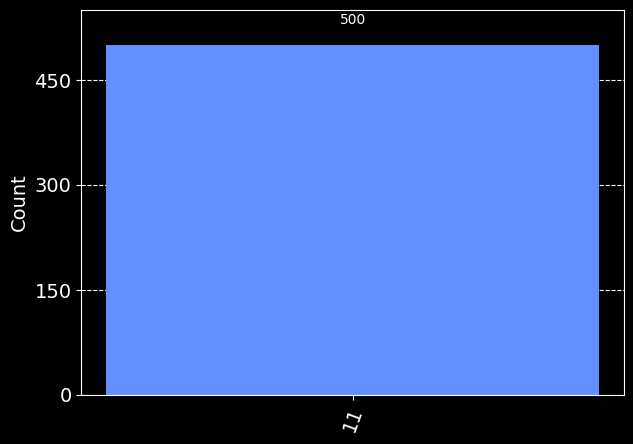

In [17]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2,2) # stands for 2 qubits and 2 classical bits

# currently : 0. 0
circuit.h(0)
# 1,0
circuit.cx(0,1) # cnot. controlled not. Flips 2nd qubit IF first qubit is 1
# 1,1
circuit.measure([0,1], [0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [20]:
job = q.execute(circuit, backend = backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


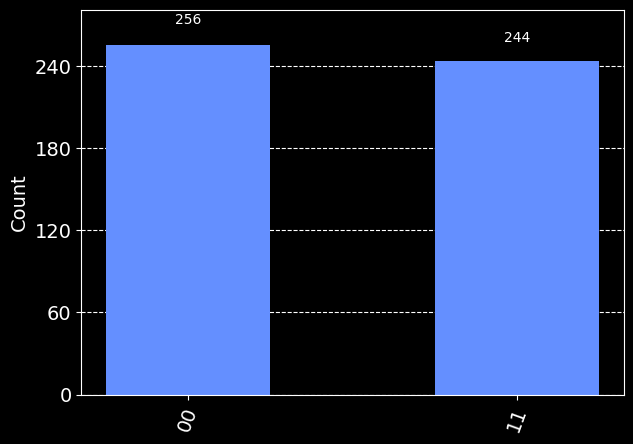

In [22]:
style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [23]:
from qiskit import Aer # simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


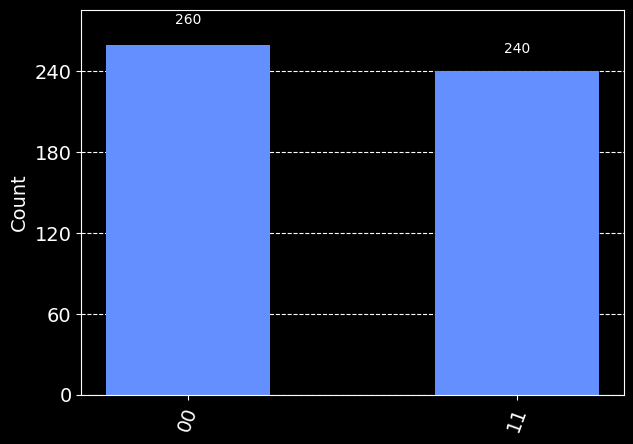

In [25]:
job = q.execute(circuit, backend = sim_backend, shots=500)
job_monitor(job)

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])